In [ ]:
!pip install 'aif360[LFR]'

     |████████████████████████████████| 175 kB 5.3 MB/s 
     |████████████████████████████████| 564 kB 33.6 MB/s 
  Created wheel for memory-profiler: filename=memory_profiler-0.60.0-py3-none-any.whl size=31284 sha256=afa90d8437e01f9744e790f0b621f770c85074a01f57e9dfd28a4a2493963fdd
  Stored in directory: /root/.cache/pip/wheels/67/2b/fb/326e30d638c538e69a5eb0aa47f4223d979f502bbdb403950f
Successfully built memory-profiler


In [ ]:
cd /usr/local/lib/python3.7/dist-packages/aif360/data/raw/adult

/usr/local/lib/python3.7/dist-packages/aif360/data/raw/adult


In [ ]:
!wget https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data
!wget https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.names
!wget https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.test

--2022-05-11 16:45:53--  https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3974305 (3.8M) [application/x-httpd-php]
Saving to: ‘adult.data’

adult.data          100%[===================>]   3.79M  9.21MB/s    in 0.4s    

2022-05-11 16:45:54 (9.21 MB/s) - ‘adult.data’ saved [3974305/3974305]

--2022-05-11 16:45:54--  https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.names
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 5229 (5.1K) [application/x-httpd-php]
Saving to: ‘adult.names’

adult.names         100%[===================>]   5.11K  --.-KB/s    in 0s      

2022-

In [ ]:
!pip install dalex

     |████████████████████████████████| 1.0 MB 5.3 MB/s 
     |████████████████████████████████| 38.1 MB 43.9 MB/s 
  Created wheel for dalex: filename=dalex-1.4.1-py3-none-any.whl size=1042860 sha256=e95bcebcd27d175fb66a25140fbbbbdb05e2baff9c06894b0e5c9490c9a30444
  Stored in directory: /root/.cache/pip/wheels/8c/8e/1b/95d59374d386e8e495aed6cbab4c4b6d72be73993a424c5e12
Successfully built dalex
  Attempting uninstall: scipy
    Found existing installation: scipy 1.4.1
    Uninstalling scipy-1.4.1:
      Successfully uninstalled scipy-1.4.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
albumentations 0.1.12 requires imgaug<0.2.7,>=0.2.5, but you have imgaug 0.2.9 which is incompatible.
aif360 0.4.0 requires scipy<1.6.0,>=1.2.0, but you have scipy 1.7.3 which is incompatible.


In [ ]:
# Import the AIF360 library and set the random seed.
import numpy as np
import pandas as pd
from aif360.datasets import AdultDataset
from aif360.algorithms.preprocessing.optim_preproc_helpers.data_preproc_functions import load_preproc_data_adult
from aif360.algorithms.preprocessing.optim_preproc_helpers.data_preproc_functions import load_preproc_data_german
from aif360.metrics import ClassificationMetric, BinaryLabelDatasetMetric
from aif360.algorithms.preprocessing.reweighing import Reweighing
import pdb
from sklearn import metrics
from sklearn.preprocessing import StandardScaler  #MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.svm import SVC
from sklearn import model_selection
from sklearn.model_selection import *
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold, StratifiedKFold
from sklearn import linear_model, tree, ensemble
from sklearn.metrics import accuracy_score
from sklearn.pipeline import make_pipeline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt



np.random.seed(0)

In [ ]:
# Define where the bias is in the features in dataset
privileged_groups = [{'sex': 1}]
unprivileged_groups = [{'sex': 0}]
dataset_orig = load_preproc_data_adult(['sex'])

# Split into train and test
train, test = dataset_orig.split([0.7], shuffle=True)
print("Training data size", train.features.shape)
print("Favourable and ufavourable labels:", train.favorable_label, train.unfavorable_label)
print("Protected attribute name:", train.protected_attribute_names)
print("Privileged and unprivileged protected attribute values:", train.privileged_protected_attributes, train.unprivileged_protected_attributes)
print("Dataset feature names", train.feature_names)

Training data size (34189, 18)
Favourable and ufavourable labels: 1.0 0.0
Protected attribute name: ['sex']
Privileged and unprivileged protected attribute values: [array([1.])] [array([0.])]
Dataset feature names ['race', 'sex', 'Age (decade)=10', 'Age (decade)=20', 'Age (decade)=30', 'Age (decade)=40', 'Age (decade)=50', 'Age (decade)=60', 'Age (decade)=>=70', 'Education Years=6', 'Education Years=7', 'Education Years=8', 'Education Years=9', 'Education Years=10', 'Education Years=11', 'Education Years=12', 'Education Years=<6', 'Education Years=>12']


In [ ]:
dataset_orig_train, dataset_orig_vt = dataset_orig.split([0.7], shuffle=True)
dataset_orig_valid, dataset_orig_test = dataset_orig_vt.split([0.7], shuffle=True)

In [ ]:
from aif360.datasets.binary_label_dataset import BinaryLabelDataset
metric_orig_train = BinaryLabelDatasetMetric(train, unprivileged_groups=unprivileged_groups, privileged_groups=privileged_groups)
print("Difference in mean outcomes between privileged and unpirivileged groups: %f" % metric_orig_train.mean_difference())

Difference in mean outcomes between privileged and unpirivileged groups: -0.193075


In [ ]:
# Train classifier on original data
scale_orig = StandardScaler()
X_train = scale_orig.fit_transform(train.features)
y_train = train.labels.ravel()

X_test = scale_orig.transform(test.features) 
y_test = test.labels.ravel()

lr_mod = LogisticRegression()
lr_mod.fit(X_train, y_train)
y_predict = lr_mod.predict(X_train)

# pos_ind = np.where(lr_mod.classes_ == train.favorable_label)[0][0]

# orig_train_predict = train.copy(deepcopy=True)
# orig_train_predict.labels = y_predict

In [ ]:
train.privileged_protected_attributes

[array([1.])]

In [ ]:
# Obtain for test sets
test_predict = test.copy(deepcopy=True)

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).


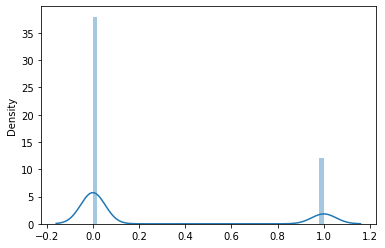

In [ ]:
%matplotlib inline
import seaborn as sns
sns.distplot(y_train) # Look at target's distribution and descriptive stats

In [ ]:
df_describe = pd.DataFrame(y_train)
df_describe.describe()

,0
count,34189.000000
mean,0.240574
std,0.427439
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,1.000000


### **Adult Dataset**

**Implement the algorithm**

**Logistic Regression**

In [ ]:
classifier = LogisticRegression()
print(classifier)

LogisticRegression()


**Implement cross validation**

In [ ]:
accuracies = cross_val_score(cv=5, estimator=classifier, X=X_train, y=y_train)
print('Accuracies:', accuracies)
print('Average:', accuracies.mean())
print('Std Deviation:', accuracies.std())

Accuracies: [0.79833285 0.80242761 0.80783855 0.80535244 0.8067866 ]
Average: 0.8041476100205415
Std Deviation: 0.0034295426661269768


**Grid search for parameter selection**

In [ ]:
solvers = ['newton-cg']
penalty = ['l2']
c_values = [100, 10, 1.0, 0.1, 1e-2, 1e-3, 1e-4, 1e-5]
# define grid search
grid = dict(solver=solvers,penalty=penalty,C=c_values)

grid_search = GridSearchCV(
    estimator=classifier,
    param_grid=grid,
    cv=5, # number of folds
    n_jobs=-1 # all available computing power
)

grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': [100, 10, 1.0, 0.1, 0.01, 0.001, 0.0001, 1e-05],
                         'penalty': ['l2'], 'solver': ['newton-cg']})

In [ ]:
best_parameters = grid_search.best_params_
print('Best parameters:', best_parameters)

best_result = grid_search.best_score_
print('Best accuracy:', best_result)

Best parameters: {'C': 100, 'penalty': 'l2', 'solver': 'newton-cg'}
Best accuracy: 0.8041476100205415


**Create best model**

In [ ]:
lr_best_model = LogisticRegression(C=100, penalty='l2', solver='newton-cg')
lr_best_model = lr_best_model.fit(X_train,y_train)

best_model_cv = cross_val_score(cv=5, estimator=grid_search, X=X_train, y=y_train)
print('Accuracies:', best_model_cv)
print('Average:', best_model_cv.mean())
print('Std Deviation:', best_model_cv.std())

Accuracies: [0.79833285 0.80242761 0.80783855 0.80462123 0.8067866 ]
Average: 0.8040013684294329
Std Deviation: 0.003390415336012397


In [ ]:
y_pred_best_model = cross_val_predict(cv=5, estimator=grid_search, X=X_test, y=y_test)
test_pred_best = test.copy()
test_pred_best.labels = y_pred_best_model

metric = ClassificationMetric(test, test_pred_best, unprivileged_groups=unprivileged_groups, privileged_groups=privileged_groups)
metric_arrs={}
metric_arrs['eq_opp_diff']=(metric.equal_opportunity_difference())
metric_arrs['disp_imp']=(metric.disparate_impact())
print(metric_arrs)

{'eq_opp_diff': -0.434006734006734, 'disp_imp': 0.0}


Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.


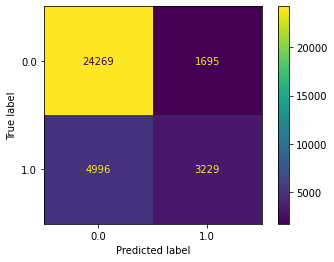

In [ ]:
from sklearn.metrics import confusion_matrix, plot_confusion_matrix, ConfusionMatrixDisplay

plot_confusion_matrix(lr_best_model, X_train, y_train)

[Text(0, 0.5, 'True'), Text(0.5, 0, 'Predicted')]

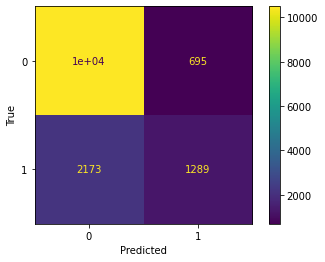

In [ ]:
cm = confusion_matrix(test.labels, y_pred_best_model)
cmd = ConfusionMatrixDisplay(cm)
cmd.plot()
cmd.ax_.set(xlabel='Predicted', ylabel='True')

In [ ]:
lr_best_model2 = LogisticRegression(C=1e-4, penalty='l2', solver='newton-cg')
lr_best_model2 = lr_best_model2.fit(X_train,y_train)

In [ ]:
accuracies2 = cross_val_score(cv=5, estimator=lr_best_model2, X=X_train, y=y_train)
print('Accuracies:', accuracies2)
print('Average:', accuracies2.mean())
print('Std Deviation:', accuracies2.std())

Accuracies: [0.75943258 0.75943258 0.75943258 0.75943258 0.7593974 ]
Average: 0.7594255454049874
Std Deviation: 1.4074443023170957e-05


In [ ]:
y_pred_best_model2 = cross_val_predict(cv=5, estimator=lr_best_model2, X=X_test, y=y_test)
test_pred_best2 = test.copy()
test_pred_best2.labels = y_pred_best_model2

metric = ClassificationMetric(test, test_pred_best2, unprivileged_groups=unprivileged_groups, privileged_groups=privileged_groups)
metric_arrs = {}
metric_arrs['eq_opp_diff']=(metric.equal_opportunity_difference())
metric_arrs['disp_imp']=(metric.disparate_impact())
print(metric_arrs)


{'eq_opp_diff': 0.0, 'disp_imp': nan}


invalid value encountered in double_scalars


In [ ]:
kf =KFold(n_splits=5, shuffle=True)

cnt = 1
# split()  method generate indices to split data into training and test set.
for train_index, test_index in kf.split(X_train, y_train):
    print(f'Fold:{cnt}, Train set: {len(train_index)}, {train_index}, Test set:{len(test_index)}, {test_index}')
    cnt += 1

Fold:1, Train set: 27351, [    0     1     2 ... 34186 34187 34188], Test set:6838, [   13    18    19 ... 34176 34177 34178]
Fold:2, Train set: 27351, [    0     1     3 ... 34186 34187 34188], Test set:6838, [    2     5     6 ... 34162 34179 34183]
Fold:3, Train set: 27351, [    0     1     2 ... 34184 34185 34187], Test set:6838, [    3     4    10 ... 34173 34186 34188]
Fold:4, Train set: 27351, [    0     2     3 ... 34185 34186 34188], Test set:6838, [    1     8    11 ... 34181 34184 34187]
Fold:5, Train set: 27352, [    1     2     3 ... 34186 34187 34188], Test set:6837, [    0     9    12 ... 34180 34182 34185]


In [ ]:
c_values = [100, 10, 1.0, 0.1, 1e-2, 1e-3, 1e-4, 1e-5]
for algo in c_values:
    score = cross_val_score(linear_model.LogisticRegression(C=algo), X_train, y_train, cv= 5, scoring="accuracy")
    print(f'Average score({algo}): {"{:}".format(score.mean())}')

Average score(100): 0.8041476100205415
Average score(10): 0.8041476100205415
Average score(1.0): 0.8041476100205415
Average score(0.1): 0.8041476100205415
Average score(0.01): 0.8039136234747678
Average score(0.001): 0.80347489014555
Average score(0.0001): 0.7594255454049874
Average score(1e-05): 0.7594255454049874


In [ ]:
y_pred_best_model2 = cross_val_predict(cv=kf, estimator=lr_best_model2, X=X_test, y=y_test)
test_pred_best2 = test.copy()
test_pred_best2.labels = y_pred_best_model2

metric = ClassificationMetric(test, test_pred_best2, unprivileged_groups=unprivileged_groups, privileged_groups=privileged_groups)
metric_arrs = {}
metric_arrs['eq_opp_diff']=(metric.equal_opportunity_difference())
print(metric_arrs)

{'eq_opp_diff': 0.0}


In [ ]:
y_test_pred_LR=lr_best_model2.predict(X_test)

In [ ]:
from sklearn.metrics import precision_score, recall_score, confusion_matrix, classification_report,accuracy_score, f1_score
import seaborn as sns
cf=confusion_matrix(y_test, y_test_pred_LR)
TP=cf[1][1]
TN=cf[0][0]
FN=cf[1][0]
FP=cf[0][1]
print('Accuracy on test:', accuracy_score(y_test,y_test_pred_LR),"\n")
print('F1 score on test:', f1_score(y_test,y_test_pred_LR),"\n")
precision=(TP/(TP+FP))
print("Precision :" , precision,"\n")
specificity=TN/(TN+FP)
print("Specificity :" , specificity,"\n")
recall=TP/(TP+FN)
print("Recall :" , recall,"\n")

Accuracy on test: 0.763734388862349 

F1 score on test: 0.0 

Precision : nan 

Specificity : 1.0 

Recall : 0.0 



invalid value encountered in long_scalars


**Support Vector Machine**

In [ ]:
svm = SVC()
svm.fit(X_train, y_train)

SVC()

In [ ]:
accuracies = cross_val_score(cv=5, estimator=svm, X=X_train, y=y_train)
print('Accuracies:', accuracies)
print('Average:', accuracies.mean())
print('Std Deviation:', accuracies.std())

Accuracies: [0.79964902 0.80155016 0.80754607 0.80374378 0.80649408]
Average: 0.8037966216459885
Std Deviation: 0.0029525098233585696


**Create best model**

In [ ]:
y_pred_svm = cross_val_predict(cv=5, estimator=svm, X=X_test, y=y_test)
test_pred_svm = test.copy()
test_pred_svm.labels = y_pred_svm

metric = ClassificationMetric(test, test_pred_svm, unprivileged_groups=unprivileged_groups, privileged_groups=privileged_groups)
metric_arrs={}
metric_arrs['eq_opp_diff']=(metric.equal_opportunity_difference())
print(metric_arrs)

{'eq_opp_diff': -0.46565656565656566}


In [ ]:
parameters = [{'C': [1], 'kernel': ['linear']}]
grid_search_svc = GridSearchCV(estimator = svm,
                           param_grid = parameters,
                           scoring = 'accuracy',
                           cv = 5,
                           n_jobs = -1)
grid_search_svc.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=SVC(), n_jobs=-1,
             param_grid=[{'C': [1], 'kernel': ['linear']}], scoring='accuracy')

In [ ]:
#svcc = SVC(C=10, kernel='linear')
#svcc.fit(X_train, y_train)
accuracies_svc = cross_val_score(cv=5, estimator=grid_search_svc, X=X_train, y=y_train)
print('Accuracies:', accuracies_svc)
print('Average:', accuracies_svc.mean())
print('Std Deviation:', accuracies_svc.std())

Accuracies: [0.78224627 0.7834162  0.79189822 0.78356245 0.79025889]
Average: 0.7862764041791599
Std Deviation: 0.003981286716708653


In [ ]:
y_pred_svcc = cross_val_predict(cv=5, estimator=svcc, X=X_test, y=y_test)
test_pred_svcc = test.copy()
test_pred_svcc.labels = y_pred_svcc

metric = ClassificationMetric(test, test_pred_svcc, unprivileged_groups=unprivileged_groups, privileged_groups=privileged_groups)
metric_arrs={}
metric_arrs['eq_opp_diff']=(metric.equal_opportunity_difference())
print(metric_arrs)

**Reweighing**

**Logistic Regression**

In [ ]:
# Transform the original dataset via reweighing to mitigate the bias
RW = Reweighing(unprivileged_groups=unprivileged_groups,
                privileged_groups=privileged_groups)
RW.fit(train)
train_weight = RW.transform(train)

print("subgroup weights", np.unique(train_weight.instance_weights))

subgroup weights [0.78875735 0.85514075 1.09270553 2.1493453 ]


In [ ]:
lr_reweigh = LogisticRegression(C=0.0001, penalty='l2', solver='newton-cg')
lr_reweigh = lr_reweigh.fit(X_train,y_train, sample_weight=train_weight.instance_weights)

reweigh_model_cv = cross_val_score(cv=5, estimator=lr_reweigh, X=X_train, y=y_train)
print('Accuracies:', reweigh_model_cv)
print('Average:', reweigh_model_cv.mean())
print('Std Deviation:', reweigh_model_cv.std())

Accuracies: [0.75943258 0.75943258 0.75943258 0.75943258 0.7593974 ]
Average: 0.7594255454049874
Std Deviation: 1.4074443023170957e-05


In [ ]:
y_pred_reweigh = cross_val_predict(cv=5, estimator=lr_reweigh, X=X_test, y=y_test)
test_pred_reweigh = test.copy()
test_pred_reweigh.labels = y_pred_reweigh

metric = ClassificationMetric(test, test_pred_reweigh, unprivileged_groups=unprivileged_groups, privileged_groups=privileged_groups)
metric_arrs={}
metric_arrs['eq_opp_diff']=(metric.equal_opportunity_difference())
print(metric_arrs)

{'eq_opp_diff': 0.0}


**Support Vector Machine**

In [ ]:
svc_reweigh = SVC(C=10, kernel='linear')
svc_reweigh = svc_reweigh.fit(X_train, y_train, sample_weight=train_weight.instance_weights)

reweigh_model_svc = cross_val_score(cv=5, estimator=svc_reweigh, X=X_train, y=y_train)
print('Accuracies:', reweigh_model_svc)
print('Average:', reweigh_model_svc.mean())
print('Std Deviation:', reweigh_model_svc.std())

In [ ]:
y_pred_svc_reweigh = cross_val_predict(cv=5, estimator=svc_reweigh, X=X_test, y=y_test)
test_pred_svc_reweigh = test.copy()
test_pred_svc_reweigh.labels = y_pred_svc_reweigh

metric = ClassificationMetric(test, test_pred_svc_reweigh, unprivileged_groups=unprivileged_groups, privileged_groups=privileged_groups)
metric_arrs['eq_opp_diff']=(metric.equal_opportunity_difference())
print(metric_arrs)

{'eq_opp_diff': -0.15843393282417673}


In [ ]:
svc_reweigh = SVC()
svc_reweigh = svc_reweigh.fit(X_train, y_train, sample_weight=train_weight.instance_weights)

reweigh_model_svc = cross_val_score(cv=5, estimator=svc_reweigh, X=X_train, y=y_train)
print('Accuracies:', reweigh_model_svc)
print('Average:', reweigh_model_svc.mean())
print('Std Deviation:', reweigh_model_svc.std())

Accuracies: [0.79964902 0.80155016 0.80754607 0.80374378 0.80649408]
Average: 0.8037966216459885
Std Deviation: 0.0029525098233585696


In [ ]:
y_pred_svc_reweigh = cross_val_predict(cv=5, estimator=svc_reweigh, X=X_test, y=y_test)
test_pred_svc_reweigh = test.copy()
test_pred_svc_reweigh.labels = y_pred_svc_reweigh

metric = ClassificationMetric(test, test_pred_svc_reweigh, unprivileged_groups=unprivileged_groups, privileged_groups=privileged_groups)
metric_arrs = {}
metric_arrs['eq_opp_diff']=(metric.equal_opportunity_difference())
print(metric_arrs)

{'eq_opp_diff': -0.46565656565656566}


# **German Dataset**

In [ ]:
cd /usr/local/lib/python3.7/dist-packages/aif360/data/raw/german

In [ ]:
!wget https://archive.ics.uci.edu/ml/machine-learning-databases/statlog/german/german.data
!wget https://archive.ics.uci.edu/ml/machine-learning-databases/statlog/german/german.data-numeric
!wget https://archive.ics.uci.edu/ml/machine-learning-databases/statlog/german/german.doc

In [ ]:
# Define where the bias is in the features in dataset
privileged_groups = [{'sex': 1}]
unprivileged_groups = [{'sex': 0}]
dataset_orig = load_preproc_data_german(['sex'])

train, test = dataset_orig.split([0.7], shuffle=True)

In [ ]:
# Train classifier on original data
scale_orig = StandardScaler()
X_train = scale_orig.fit_transform(train.features)
y_train = train.labels.ravel()

X_test = scale_orig.transform(test.features) 
y_test = test.labels.ravel()

lr_mod = LogisticRegression()
lr_mod.fit(X_train, y_train)
y_predict = lr_mod.predict(X_train)

**Logistic Regression**

In [ ]:
lr_mod = LogisticRegression()
lr_mod.fit(X_train, y_train)

In [ ]:
grid = {'solver' :  ['newton-cg', 'lbfgs', 'liblinear'],
        'C': [1000, 100, 10, 1.0, 0.1, 0.01, 0.001, 0.0001, 0.00001]}
grid_search = GridSearchCV(estimator=lr_mod, param_grid=grid, n_jobs=-1, cv=5, scoring='accuracy')
grid_result = grid_search.fit(X_train, y_train)
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

Best: 0.700000 using {'C': 1.0, 'solver': 'newton-cg'}


In [ ]:
lr_model_ger = LogisticRegression(C=1, penalty='l2', solver='newton-cg')
lr_model_ger = lr_model_ger.fit(X_train,y_train)

ger_model_cv = cross_val_score(cv=5, estimator=lr_model_ger, X=X_train, y=y_train)
print('Accuracies:', ger_model_cv)
print('Average:', ger_model_cv.mean())
print('Std Deviation:', ger_model_cv.std())

In [ ]:
y_pred_model_ger = cross_val_predict(cv=5, estimator=lr_model_ger, X=X_test, y=y_test)
test_pred_ger = test.copy()
test_pred_ger.labels = y_pred_model_ger

metric = ClassificationMetric(test, test_pred_ger, unprivileged_groups=unprivileged_groups, privileged_groups=privileged_groups)
metric_arrs={}
metric_arrs['eq_opp_diff']=(metric.equal_opportunity_difference())
print(metric_arrs)

**Support Vector Machine**

In [ ]:
svc_ger = SVC(C=1, kernel='linear')
svc_ger.fit(X_train, y_train)
accuracies_svc_ger = cross_val_score(cv=5, estimator=svc_ger, X=X_train, y=y_train)
print('Accuracies:', accuracies_svc_ger)
print('Average:', accuracies_svc_ger.mean())
print('Std Deviation:', accuracies_svc_ger.std())

In [ ]:
y_pred_svc_ger = cross_val_predict(cv=5, estimator=svc_ger, X=X_test, y=y_test)
test_pred_svc_ger = test.copy()
test_pred_svc_ger.labels = y_pred_svc_ger

metric = ClassificationMetric(test, test_pred_svc_ger, unprivileged_groups=unprivileged_groups, privileged_groups=privileged_groups)
metric_arrs={}
metric_arrs['eq_opp_diff']=(metric.equal_opportunity_difference())
print(metric_arrs)

**Reweighing**

In [ ]:
RW = Reweighing(unprivileged_groups=unprivileged_groups,
                privileged_groups=privileged_groups)
RW.fit(train)
train_weight = RW.transform(train)

print("subgroup weights", np.unique(train_weight.instance_weights))

**Logistic Regression**

In [ ]:
lr_reweigh_ger = LogisticRegression(C=1e-3, penalty='l2', solver='newton-cg')
lr_reweigh_ger = lr_reweigh_ger.fit(X_train,y_train, sample_weight=train_weight.instance_weights)

reweigh_model_cv_ger = cross_val_score(cv=5, estimator=lr_reweigh_ger, X=X_train, y=y_train)
print('Accuracies:', reweigh_model_cv_ger)
print('Average:', reweigh_model_cv_ger.mean())
print('Std Deviation:', reweigh_model_cv_ger.std())

In [ ]:
y_pred_reweigh_ger = cross_val_predict(cv=5, estimator=lr_reweigh_ger, X=X_test, y=y_test)
test_pred_reweigh_ger = test.copy()
test_pred_reweigh_ger.labels = y_pred_reweigh_ger

metric = ClassificationMetric(test, test_pred_reweigh_ger, unprivileged_groups=unprivileged_groups, privileged_groups=privileged_groups)
metric_arrs={}
metric_arrs['eq_opp_diff']=(metric.equal_opportunity_difference())
print(metric_arrs)

**Support Vector Machine**

In [ ]:
svc_reweigh_ger = SVC(C=1, kernel='linear')
svc_reweigh_ger = svc_reweigh_ger.fit(X_train, y_train, sample_weight=train_weight.instance_weights)

reweigh_model_svc_ger = cross_val_score(cv=5, estimator=svc_reweigh_ger, X=X_train, y=y_train)
print('Accuracies:', reweigh_model_svc_ger)
print('Average:', reweigh_model_svc_ger.mean())
print('Std Deviation:', reweigh_model_svc_ger.std())

In [ ]:
y_pred_svc_reweigh_ger = cross_val_predict(cv=5, estimator=svc_reweigh_ger, X=X_test, y=y_test)
test_pred_svc_reweigh_ger = test.copy()
test_pred_svc_reweigh_ger.labels = y_pred_svc_reweigh_ger

metric = ClassificationMetric(test, test_pred_svc_reweigh_ger, unprivileged_groups=unprivileged_groups, privileged_groups=privileged_groups)
metric_arrs['eq_opp_diff']=(metric.equal_opportunity_difference())
print(metric_arrs)